Next steps:

 - load ROIs (or create one with shape of the image)
 - make adaptations to database:
   - ~use Path objects to enable continous integration~
   - ~rename deepflash2_dir to segmentation_tool_dir~
   - create sorted list of all preprocessing steps (i.e. preprocessing strategies)
 - adapt main
 - function that saves preprocessed images

 - Minimal preprocessing steps are:
    - save the "unprocessed" microscopy images to the preprocessed_dir
    - load the unprocessed ROIs into the database (create ROI with shape of image if whole image is to be analyzed)

In [37]:
from pathlib import Path
from shapely.geometry import Polygon
import roifile
import numpy as np

In [65]:
roi_filepath = Path('/mnt/c/Users/dsege/TEMP/test_project2/01_rois_to_analyze/tg/#5_tg_old/#hund.roi')

In [57]:
roi_filepath = Path('/mnt/c/Users/dsege/TEMP/test_project2/01_rois_to_analyze/tg/#5_tg_old/RoiSet.zip')

In [47]:
roi_filepath.name.endswith('.zip')

False

In [53]:
'.zip' in ['.roi', '.zip']

True

In [61]:
loaded_rois[1].name

'0240-0268'

In [66]:
if roi_filepath.name.endswith('.roi'):
    loaded_rois = [roifile.ImagejRoi.fromfile(roi_filepath)]
elif roi_filepath.name.endswith('.zip'):
    loaded_rois = roifile.ImagejRoi.fromfile(roi_filepath)
else:
    filetype = roi_filepath.name[roi_filepath.name.find('.'):]
    raise ValueError(f'ImageJROIReader cannot handle files of type {filetype}')

rois_as_shapely_polygons = {'all_planes': dict()}
roi_count = len(loaded_rois)
for roi_index in range(roi_count):
    row_coords = loaded_rois[roi_index].coordinates()[:, 1]
    col_coords = loaded_rois[roi_index].coordinates()[:, 0]
    if roi_count > 1:
        rois_as_shapely_polygons['all_planes'][loaded_rois[roi_index].name] = Polygon(np.asarray(list(zip(row_coords, col_coords))))
    else:
        rois_as_shapely_polygons['all_planes'][str(roi_index).zfill(3)] = Polygon(np.asarray(list(zip(row_coords, col_coords)))) 


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/dsege/TEMP/test_project2/01_rois_to_analyze/tg/#5_tg_old/#hund.roi'

In [85]:
row_coords

[289.0, 371.0, 371.0, 289.0, 289.0]

In [95]:
row_coords = [row - 5 for row in row_coords]
row_coords

[284.0, 366.0, 366.0, 284.0, 284.0]

In [87]:
a = np.asarray(row_coords)

In [88]:
a -= 5

In [89]:
a

array([284., 366., 366., 284., 284.])

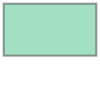

In [93]:
Polygon(np.asarray(list(zip(np.asarray(row_coords), np.asarray(col_coords)))))

In [94]:
col_coords

[380.0, 380.0, 426.0, 426.0, 380.0]

In [84]:
row_coords = [coordinates[0] for coordinates in rois_as_shapely_polygons['all_planes']['0330-0403'].boundary.coords[:]]
col_coords = [coordinates[1] for coordinates in rois_as_shapely_polygons['all_planes']['0330-0403'].boundary.coords[:]]

In [78]:
rois_as_shapely_polygons['all_planes'].keys()

dict_keys(['0118-0098', '0240-0268', '0374-0150', '0330-0403'])

In [33]:
f'ImageJROIReader cannot handle files of type {filetype}'

'ImageJROIReader cannot handle files of type .zip'

In [18]:
roi[0].coordinates()

array([[ 71.,  86.],
       [ 71., 150.],
       [126., 150.],
       [126.,  86.],
       [ 71.,  86.]], dtype=float32)

In [ ]:
self.as_polygons[roi_id] = Polygon(np.asarray(list(zip(self.roi_coordinates[roi_id][0], self.roi_coordinates[roi_id][1]))))

In [ ]:
rois_as_shapely_polygons['file_id']['plane_id']['roi_id']

In [13]:
hunde = list()
katzen = list()
for x in hunde:
    katzen.append(x)
    

In [14]:
katzen

[]

In [2]:
project_root_dir = Path('/mnt/c/Users/dsege/TEMP/test_project2/')

In [12]:
project_root_dir.joinpath(elem).as_posix()

'/mnt/c/Users/dsege/TEMP/test_project2/merge_error_example_file_id_0000_plane_5_centroid_x_4201_y_2426.png'

In [10]:
elem

PosixPath('/mnt/c/Users/dsege/TEMP/test_project2/merge_error_example_file_id_0000_plane_5_centroid_x_4201_y_2426.png')

In [10]:
project_root_dir.is_dir()

True

In [15]:
project_root_dir

PosixPath('/mnt/c/Users/dsege/TEMP/test_project2')

In [ ]:
self.project_root_dir + [elem for elem in subdirectories if 'microscopy' in elem][0] + '/'

In [27]:
subdirectories

['00_microscopy_images',
 '01_rois_to_analyze',
 '02_preprocessed_images',
 '03_deepflash2',
 '04_binary_segmentations',
 '05_instance_segmentations',
 '06_inspection',
 '07_results',
 'for_sofie',
 'for_sofie.zip',
 'intermediate',
 'merge_error_example_file_id_0000_plane_5_centroid_x_4201_y_2426.png']

In [13]:
import os
def listdir_nohidden(path):
    return [f for f in os.listdir(path) if f.startswith('.') == False]

In [16]:
subdirectories = listdir_nohidden(path = project_root_dir)

In [33]:
? microscopy_image_dir.mkdir

Signature:  microscopy_image_dir.mkdir(mode=511, parents=False, exist_ok=False)
Docstring: Create a new directory at this given path.
File:      ~/anaconda3/envs/DCLwidgets_clone/lib/python3.7/pathlib.py
Type:      method


In [28]:
subdirectory_attributes = {'rois_to_analyze_dir': {'foldername': '01_rois_to_analyze',
                                                   'key_substring': 'rois'},
                           'preprocessed_images_dir': {'foldername': '02_preprocessed_images',
                                                       'key_substring': 'preprocessed'},
                           'deepflash2_dir': {'foldername': '03_deepflash2',
                                              'key_substring': 'deepflash'},
                           'binary_segmentations_dir': {'foldername': '04_binary_segmentations',
                                                        'key_substring': 'binary'},
                           'instance_segmentations_dir': {'foldername': '05_instance_segmentations',
                                                          'key_substring': 'instance'},
                           'inspection_dir': {'foldername': '06_inspection',
                                              'key_substring': 'inspection'},
                           'results_dir': {'foldername': '07_results',
                                           'key_substring': 'results'}}


In [ ]:
for attribute_key in subdirectory_attributes.keys():
    elements_matching_key_substring = [elem for elem in subdirectories if subdirectory_attributes[attribute_key]['key_substring'] in elem]
    if len(elements_matching_key_substring) > 0:
        for matching_element in elements_matching_key_substring:
            if (project_root_dir.joinpath(matching_element).is_dir()) & (hasattr(self, attribute_key) == False):
                setattr(self, attribute_key, project_root_dir.joinpath(matching_element))
    if hasattr(self, attribute_key) == False:
        subdirectory_path = project_root_dir.joinpath(subdirectory_attributes[attribute_key]['foldername'])
        subdirectory_path.mkdir()
        setattr(self, attribute_key, subdirectory_path)
                
                

In [19]:
folder = [elem for elem in subdirectories if 'microscopy' in elem][0]

In [23]:
microscopy_image_dir = project_root_dir.joinpath('hund')

In [29]:
project_root_dir.joinpath('hund').is_dir()
    

False

In [26]:
microscopy_image_dir

PosixPath('/mnt/c/Users/dsege/TEMP/test_project2/hund')

In [ ]:
from findmycells.main import Project
import os
import pandas as pd
from datetime import datetime